In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
import itertools
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import scipy.stats as scs

%matplotlib inline

In [2]:
#เตรียมdata
df = pd.read_csv('CCP_new.csv', index_col=0, parse_dates=True)
df

,Close,Volume,Holiday,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Date,,,,,,,,,,
2014-01-02,0.88569,5190249,0,3,1,1,2014,2,2,1
2014-01-03,0.84661,2730328,0,4,1,1,2014,3,3,1
2014-01-06,0.80754,5514553,0,0,1,1,2014,6,6,2
2014-01-07,0.85095,4590470,0,1,1,1,2014,7,7,2
2014-01-08,0.83793,2015385,0,2,1,1,2014,8,8,2
2014-01-09,0.83793,1322092,0,3,1,1,2014,9,9,2
2014-01-10,0.81622,1514648,0,4,1,1,2014,10,10,2
2014-01-13,0.83359,2317116,0,0,1,1,2014,13,13,3
2014-01-14,0.86832,6645932,0,1,1,1,2014,14,14,3


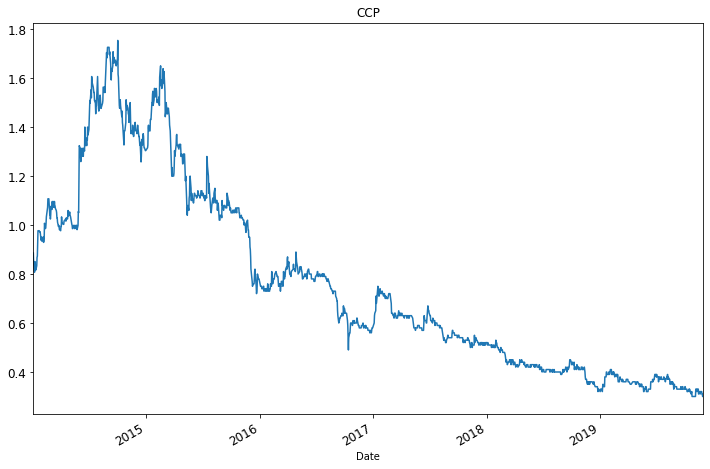

In [3]:
df.Close.plot(figsize=(12,8), title= 'CCP', fontsize=12);

<Figure size 432x288 with 0 Axes>

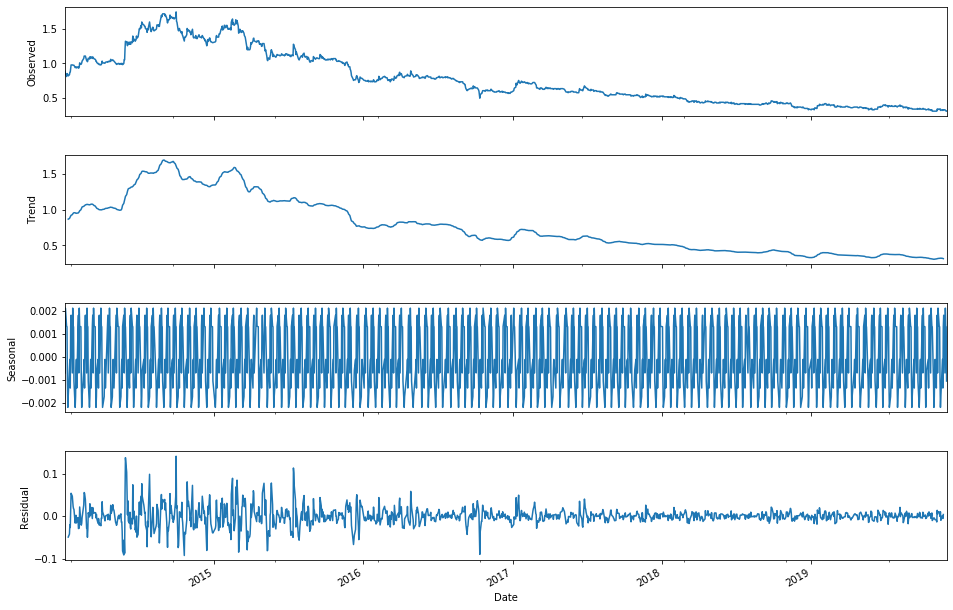

In [4]:
#นำมาplot โดนใช้module sesonal
decomposition = seasonal_decompose(df.Close, freq=12)  
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15, 10)

In [6]:
plt.style.use('fivethirtyeight')

In [7]:
#กำหนดพารามิเตอร์ p d q 0-2
p = d = q = range(0, 2)


#สร้าง model p d q ให้อยู่รวมกัน
pdq = list(itertools.product(p, d, q))

seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [9]:
warnings.filterwarnings("ignore") 

best_aic = np.inf 
best_param = None
best_seasonal = None
best_mod = None


for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            temp_mod = sm.tsa.statespace.SARIMAX(df.rainfall,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = temp_mod.fit()
           
            
            temp_aic = results.aic
            if temp_aic < best_aic:
                best_aic = temp_aic
                best_param = param
                best_seasonal = param_seasonal
                best_mod = temp_mod
                
        except:
            continue
            
            #results = mod.fit()

print('Best model: ARIMA{}x{}12 - AIC:{}'.format(best_param, best_seasonal, best_aic))

Best model: ARIMANonexNone12 - AIC:inf


In [11]:
#นำมาหาค่า Errorต่างๆ
mod = sm.tsa.statespace.SARIMAX(df.Close,
                                order=(1, 0, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9986      0.002    481.985      0.000       0.995       1.003
ma.L1         -0.0101      0.016     -0.645      0.519      -0.041       0.021
ma.S.L12      -0.9872      0.026    -38.239      0.000      -1.038      -0.937
sigma2         0.0005   1.24e-05     37.020      0.000       0.000       0.000


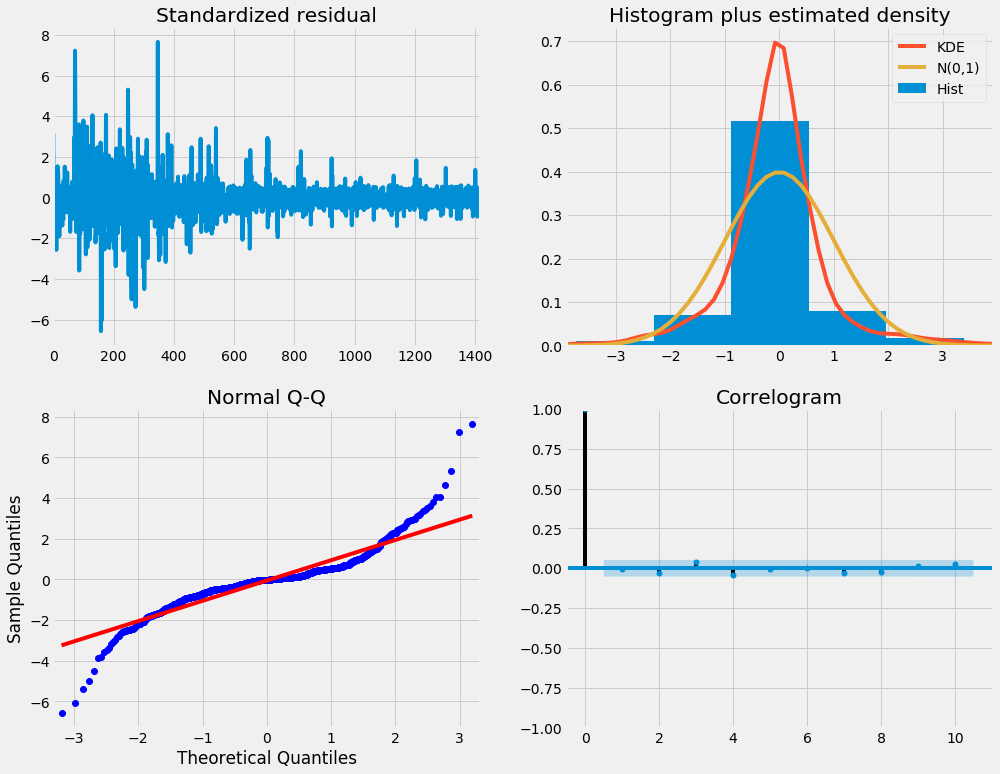

In [12]:
#นำมาplot กราฟทั้ง4กราฟ ได้เเก่ standardized residual histogram NormalQ-Q Correlogram
results.plot_diagnostics(figsize=(15, 12))
plt.show()